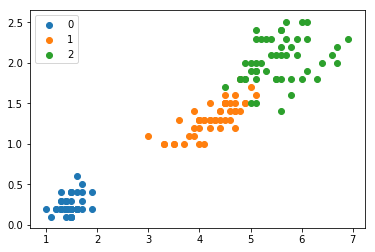

(100, 2)
(100,)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import datasets

df = datasets.load_iris()
X = df.data[:, [2,3]]
y = df.target

# 把数据画出来
plt.scatter(X[y==0, 0], X[y==0, 1], label='0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')
plt.scatter(X[y==2, 0], X[y==2, 1], label='2')
plt.legend()
plt.show()

# 我们先关注最简单的二分类问题
# 删掉类别2，只用1和0
X = X[y!=2,:]
y = y[y!=2]
y[y==0] = -1

print(X.shape)
print(y.shape)

$$
f(x) = \sum_{i=1}^m\alpha_iy_i\kappa(x_i, x) + b
$$

$$


f(x) = \alpha_iy_i\kappa(X, x) + b


f(x_1) = \sum_{i=1}^m\alpha_iy_i\kappa(x_i, x_1) + b \\
f(x_2) = \sum_{i=1}^m\alpha_iy_i\kappa(x_i, x_2) + b \\
f(x_j) = \sum_{i=1}^m\alpha_iy_i\kappa(x_i, x_j) + b \\
f(x_m) = \sum_{i=1}^m\alpha_iy_i\kappa(x_i, x_m) + b \\
$$





写成向量形式
$$
f(X)
$$

In [4]:
# SVM
class SVM:
    def __init__(self, X, y, C, toler, kernelOption, maxIter):
        self.X = X
        self.y = y
        self.C = C
        self.toler = toler
        self.kernelOption = kernelOption
        self.m = X.shape[0] # 样本数量
        self.n = X.shape[1] # 特征个数
        self.b = 0 # 截距
        self.maxIter = maxIter
        
    def __linear_kernel(self, x_i, x_j):
        # x_i x_j都是列向量 n*1
        return x_i.T.dot(x_j)
    
    def kernel(self, x_i, x_j):
        if self.kernelOption == 'linear':
            return self.__linear_kernel(x_i, x_j)
        
    def __selectJrand(self, i,m):
        j = i
        while j == i:
            j = int(np.random.uniform(0,m))
        return j

    def __clipAlpha(self, aj, H, L):
        if aj > H:
            aj = H
        else if aj < L:
            aj = L

        return aj

    def cal_y_hat(self, alpha, X, y, b):
        

    def smoSimple(self, X=None, y=None, C=None, toler=None, maxIter=None):
        if X is none:
            X = self.X
        if y is None:
            y = self.y
        if C is None:
            C = self.C
        if toler is None:
            toler = self.toler
        if maxIter = None:
            maxIter = self.maxIter
        m,n = X.shape

        # 初始化alpha为全0
        alpha = np.zeros((m,1))
        iter = 0

        while iter < maxIter:
            for i in range(m):
                ### check and pick up the alpha who violates the KKT condition
                ## satisfy KKT condition
                # 1) yi*f(i) >= 1 and alpha == 0 (outside the boundary)
                # 2) yi*f(i) == 1 and 0<alpha< C (on the boundary)
                # 3) yi*f(i) <= 1 and alpha == C (between the boundary)
                ## violate KKT condition
                # because y[i]*E_i = y[i]*f(i) - y[i]^2 = y[i]*f(i) - 1, so
                # 1) if y[i]*E_i < 0, so yi*f(i) < 1, if alpha < C, violate!(alpha = C will be correct) 
                # 2) if y[i]*E_i > 0, so yi*f(i) > 1, if alpha > 0, violate!(alpha = 0 will be correct)
                # 3) if y[i]*E_i = 0, so yi*f(i) = 1, it is on the boundary, needless optimized
                if alpha[i] < C 